# Esame del 28/01/2020
Il datataset weather_train.csv (preso da kaggle -- https://www.kaggle.com/nicholasjhana/energyconsumption-generation-prices-and-weather) contiene dati relativi a rilevazioni meteo registrate
in città spagnole una volta al giorno secondo il seguente schema:
'dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', ‘clouds_all', 'weather_id', 'weather_main',
'weather_description', 'weather_icon'
Il dataset è costituito da attributi con valori numerici e categorici.
L’obiettivo è quello di prevedere il tempo complessivo di una giornata (valore della feature
'weather_main') sulla base degli altri parametri.

# Parte 1: Analisi


# 1.
## Quanto sono le istanze contenute nel dataset ?
Le istanze sono il numero di colonne che sono -> 158131

## Il dataset è completo (cioè per ogni istanza tutti i valori di attributo sono sempre correttamente specificati – non esistono “missing values”)?
Si non ci sono
## Il dataset è bilanciato per quanto riguarda la classe da predire?
Non proprio perché:
- _cloud_ = 64130
- _clear_ = 77750
- _rain_ = 16251

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("Data/weather_train.csv")
df

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-05-26 09:00:00+02:00,Bilbao,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,75,803,clouds,broken clouds,04d
1,2016-07-16 10:00:00+02:00,Madrid,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,0,800,clear,sky is clear,01d
2,2018-06-03 05:00:00+02:00,Madrid,285.150,285.150,285.150,1017,100,0,0,0.0,0.0,0.0,56,803,clouds,broken clouds,04n
3,2018-10-19 10:00:00+02:00,Valencia,289.150,289.150,289.150,1011,100,4,320,0.9,0.0,0.0,75,521,rain,shower rain,09d
4,2017-11-25 07:00:00+01:00,Seville,279.940,279.150,281.150,1019,81,0,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158126,2016-08-01 10:00:00+02:00,Madrid,297.760,293.710,305.050,1021,56,2,30,0.0,0.0,0.0,0,800,clear,sky is clear,01d
158127,2017-10-12 00:00:00+02:00,Barcelona,292.830,291.150,294.150,1024,88,0,280,0.0,0.0,0.0,0,800,clear,sky is clear,01n
158128,2015-11-09 16:00:00+01:00,Bilbao,292.810,292.810,292.810,1031,62,1,25,0.0,0.0,0.0,0,800,clear,sky is clear,01
158129,2016-02-25 05:00:00+01:00,Valencia,285.220,285.220,285.220,1012,60,4,265,0.0,0.0,0.0,0,800,clear,sky is clear,01


In [3]:
df.shape[0]

158131

In [4]:
# verifico che non ci sono missing value:
df.isna().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

In [5]:
# come vedere se il dataset é bilanciato verso la classe target:
df.groupby("weather_main")["temp"].count()

weather_main
clear     77750
clouds    64130
rain      16251
Name: temp, dtype: int64

# 2.
##  Le rilevazioni con pressione e umidità uguale a 0 sono irreali. Quante sono queste rilevazioni? Eliminarle dal dataset
sono in totale 61 rilevazioni


In [6]:
pressure = np.where(df["pressure"] == 0)
len(pressure[0])

2

In [7]:
humidity = np.where(df["humidity"] == 0)
len(humidity[0])

59

In [8]:
# eliminare queste istanze
df = df.drop(humidity[0])
df

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-05-26 09:00:00+02:00,Bilbao,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,75,803,clouds,broken clouds,04d
1,2016-07-16 10:00:00+02:00,Madrid,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,0,800,clear,sky is clear,01d
2,2018-06-03 05:00:00+02:00,Madrid,285.150,285.150,285.150,1017,100,0,0,0.0,0.0,0.0,56,803,clouds,broken clouds,04n
3,2018-10-19 10:00:00+02:00,Valencia,289.150,289.150,289.150,1011,100,4,320,0.9,0.0,0.0,75,521,rain,shower rain,09d
4,2017-11-25 07:00:00+01:00,Seville,279.940,279.150,281.150,1019,81,0,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158126,2016-08-01 10:00:00+02:00,Madrid,297.760,293.710,305.050,1021,56,2,30,0.0,0.0,0.0,0,800,clear,sky is clear,01d
158127,2017-10-12 00:00:00+02:00,Barcelona,292.830,291.150,294.150,1024,88,0,280,0.0,0.0,0.0,0,800,clear,sky is clear,01n
158128,2015-11-09 16:00:00+01:00,Bilbao,292.810,292.810,292.810,1031,62,1,25,0.0,0.0,0.0,0,800,clear,sky is clear,01
158129,2016-02-25 05:00:00+01:00,Valencia,285.220,285.220,285.220,1012,60,4,265,0.0,0.0,0.0,0,800,clear,sky is clear,01


In [9]:
# poi dobbiamo ricalcolare la pressure perché gli indici potrebbe essere diversi
pressure = np.where(df["pressure"] == 0)
df = df.drop(pressure[0])
df

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-05-26 09:00:00+02:00,Bilbao,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,75,803,clouds,broken clouds,04d
1,2016-07-16 10:00:00+02:00,Madrid,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,0,800,clear,sky is clear,01d
2,2018-06-03 05:00:00+02:00,Madrid,285.150,285.150,285.150,1017,100,0,0,0.0,0.0,0.0,56,803,clouds,broken clouds,04n
3,2018-10-19 10:00:00+02:00,Valencia,289.150,289.150,289.150,1011,100,4,320,0.9,0.0,0.0,75,521,rain,shower rain,09d
4,2017-11-25 07:00:00+01:00,Seville,279.940,279.150,281.150,1019,81,0,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158126,2016-08-01 10:00:00+02:00,Madrid,297.760,293.710,305.050,1021,56,2,30,0.0,0.0,0.0,0,800,clear,sky is clear,01d
158127,2017-10-12 00:00:00+02:00,Barcelona,292.830,291.150,294.150,1024,88,0,280,0.0,0.0,0.0,0,800,clear,sky is clear,01n
158128,2015-11-09 16:00:00+01:00,Bilbao,292.810,292.810,292.810,1031,62,1,25,0.0,0.0,0.0,0,800,clear,sky is clear,01
158129,2016-02-25 05:00:00+01:00,Valencia,285.220,285.220,285.220,1012,60,4,265,0.0,0.0,0.0,0,800,clear,sky is clear,01


# 3.
## Analizzare la temperatura massima rilevata. Valutare se la distribuzione dei valori assume un andamento simile a una gaussiana. Considerare poi le rilevazioni che si collocano all’interno del 5% delle temperature più alte. Le città sono equamente presenti in quella fascia di rilevazioni? Come è il tempo complessivo nei giorni in cui la temperatura massima è in quella fascia per ogni città?
No non é distribuito equamente le cittá perché Seville ha molte istanze presenti

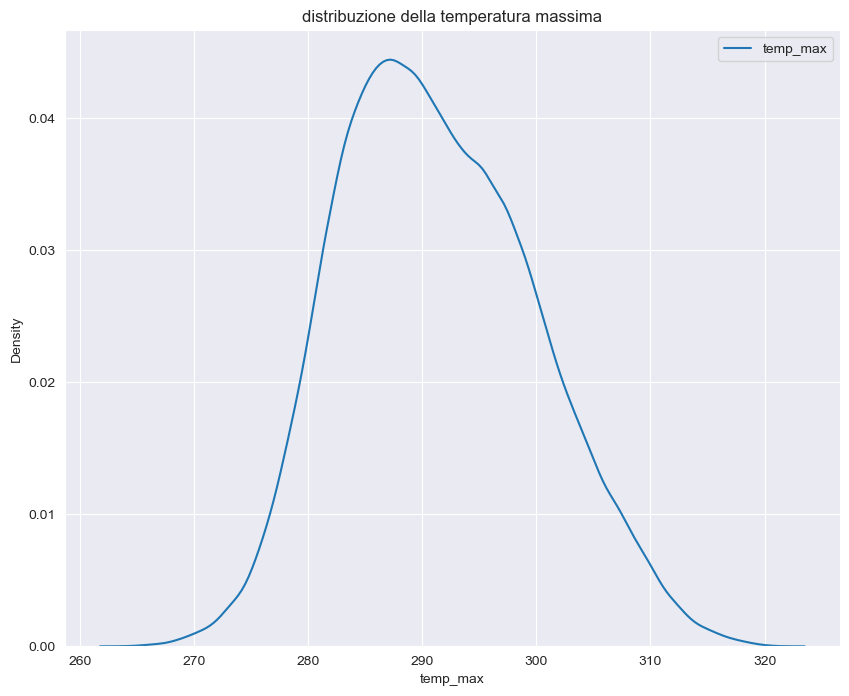

In [10]:
# potremmo vederlo graficamente se assomiglia ad una gaussiana
import seaborn as sns
import matplotlib.pyplot as plt


fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title("distribuzione della temperatura massima")

sns.kdeplot(df["temp_max"],ax=ax1, label ="temp_max")


plt.legend()

In [11]:
df['temp_max'].nlargest(n=7903).index

Int64Index([  4159, 140988,  18574,  31698,  51907, 102550, 104920, 113363,
            113639, 114977,
            ...
             14228,  14307,  14375,  14549,  14624,  14710,  14729,  14928,
             14974,  15124],
           dtype='int64', length=7903)

In [12]:
df_temp_max = df.loc[df['temp_max'].nlargest(n=7903).index]
df_temp_max

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
4159,2015-07-13 13:00:00+02:00,Seville,311.08,305.15,321.15,1018,31,1,240,0.0,0.0,0.0,0,800,clear,sky is clear,01d
140988,2015-07-13 12:00:00+02:00,Seville,310.12,303.15,321.15,1018,35,0,250,0.0,0.0,0.0,0,800,clear,sky is clear,01d
18574,2015-07-04 14:00:00+02:00,Seville,311.73,306.15,320.15,1018,19,1,140,0.0,0.0,0.0,0,800,clear,sky is clear,01d
31698,2016-07-24 13:00:00+02:00,Seville,311.64,306.15,320.15,1015,24,1,100,0.0,0.0,0.0,0,800,clear,sky is clear,01d
51907,2015-07-26 13:00:00+02:00,Seville,310.33,303.15,320.15,1015,26,1,0,0.0,0.0,0.0,0,800,clear,sky is clear,01d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14710,2018-08-04 18:00:00+02:00,Barcelona,306.15,306.15,306.15,1016,41,5,130,0.0,0.0,0.0,20,801,clouds,few clouds,02d
14729,2016-07-08 15:00:00+02:00,Madrid,305.06,304.15,306.15,1021,27,2,310,0.0,0.0,0.0,0,800,clear,sky is clear,01d
14928,2017-07-01 19:00:00+02:00,Seville,305.76,305.15,306.15,1016,14,3,50,0.0,0.0,0.0,0,800,clear,sky is clear,01d
14974,2018-07-10 14:00:00+02:00,Barcelona,304.15,302.15,306.15,1015,38,3,180,0.0,0.0,0.0,20,801,clouds,few clouds,02d


visualizziamo perché é bello:

<AxesSubplot:ylabel='temp'>

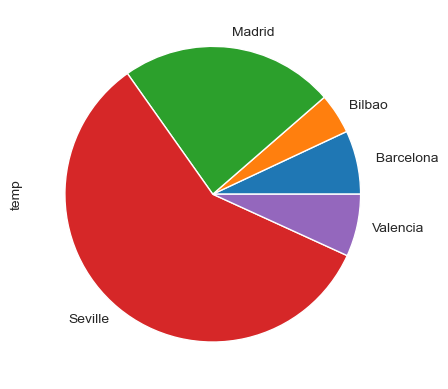

In [25]:
df_temp_max.groupby("city_name")["temp"].count().plot.pie()

In [34]:
#df_city = pd.DataFrame(columns=["city","count"])
#df_city = df_city.append({'city':'Seville','count':len(city[0])},ignore_index=True)
#df_city = df_city.append({'city':'Madrid','count':1850},ignore_index=True)
#df_city = df_city.append({'city':'Bilbao','count':349},ignore_index=True)
#df_city = df_city.append({'city':'Valencia','count':539},ignore_index=True)

#fig,ax1= plt.subplots(ncols=1, figsize=(10, 8))

#colors = sns.color_palette('bright')[0:4]
#ax1.pie(df_city["count"],labels=df_city["city"],colors=colors)
#fig.suptitle("distribuzione delle città piú calde")

<AxesSubplot:ylabel='temp'>

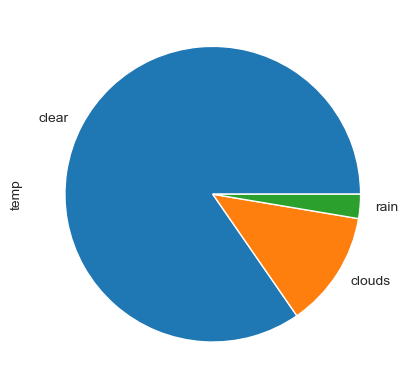

In [38]:
seville = df_temp_max.loc[df_temp_max["city_name"] == "Seville"]
seville.groupby("weather_main")["temp"].count().plot.pie()

<AxesSubplot:ylabel='temp'>

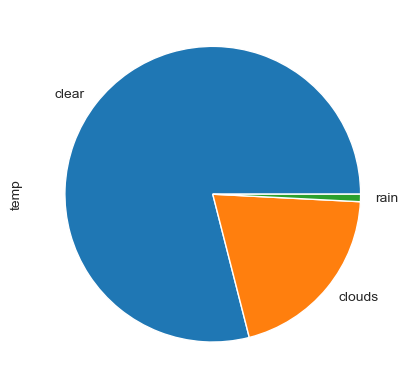

In [39]:
madrid = df_temp_max.loc[df_temp_max["city_name"] == "Madrid"]
madrid.groupby("weather_main")["temp"].count().plot.pie()

In [41]:
barcellona = df_temp_max.loc[df_temp_max["city_name"] == "Barcelona"]
barcellona

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon


<AxesSubplot:ylabel='temp'>

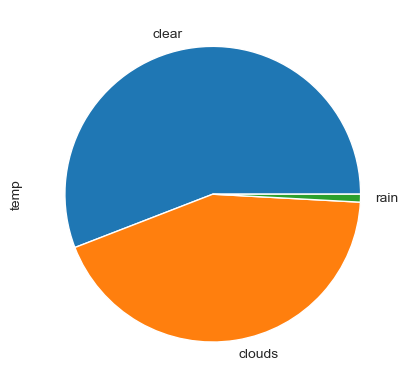

In [42]:
bilbao = df_temp_max.loc[df_temp_max["city_name"] == "Bilbao"]
bilbao.groupby("weather_main")["temp"].count().plot.pie()

<AxesSubplot:ylabel='temp'>

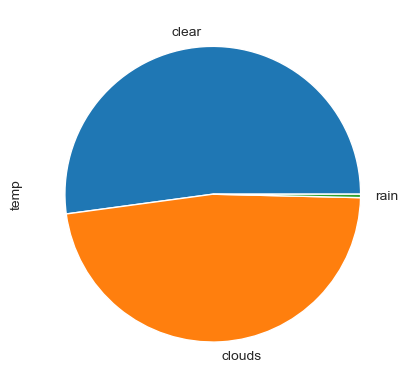

In [43]:
valencia = df_temp_max.loc[df_temp_max["city_name"] == "Valencia"]
valencia.groupby("weather_main")["temp"].count().plot.pie()

# 4.
## Verificare se quando nevica la temperatura sia prossima alla temperatura di congelamento (NOTA: il dataset riporta i valori in Kelvin)

In [46]:
df_snow = df.loc[(df["snow_3h"]  != 0)]
df_snow["temp"].describe()

count    216.000000
mean     276.118751
std        1.764093
min      272.399500
25%      274.806742
50%      276.356156
75%      276.941250
max      282.750000
Name: temp, dtype: float64

# 5.
## Confrontare l’escursione termica media (temp_max-temp_min) registrata nei giorni in cui nevica, con quella delle giornate che sono all’interno del 5% delle temperature più alte

In [47]:
df_snow

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
2600,2015-03-23 11:00:00+01:00,Bilbao,276.356000,276.356000,276.356000,1012,98,0,147,0.9,0.0,2.746,92,501,rain,moderate rain,10
2926,2015-01-20 04:00:00+01:00,Bilbao,275.203000,275.203000,275.203000,1012,97,1,198,0.3,0.0,0.200,88,500,rain,light rain,10
6250,2015-02-04 20:00:00+01:00,Bilbao,274.826656,274.826656,274.826656,1014,90,3,13,0.3,0.0,20.900,89,500,rain,light rain,10
10148,2015-02-08 16:00:00+01:00,Bilbao,277.219500,277.219500,277.219500,1031,82,2,21,0.3,0.0,0.200,78,500,rain,light rain,10
11016,2015-02-01 09:00:00+01:00,Bilbao,276.367344,276.367344,276.367344,1010,92,4,314,0.9,0.0,0.550,92,501,rain,moderate rain,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152628,2015-02-03 10:00:00+01:00,Bilbao,276.557500,276.557500,276.557500,1004,94,1,281,0.9,0.0,1.100,84,501,rain,moderate rain,10
153808,2015-02-02 03:00:00+01:00,Bilbao,276.382656,276.382656,276.382656,1012,96,1,250,0.3,0.0,0.050,84,500,rain,light rain,10
154633,2015-02-04 06:00:00+01:00,Bilbao,273.317000,273.317000,273.317000,1006,97,1,119,0.3,0.0,3.900,88,500,rain,light rain,10
157078,2015-01-22 10:00:00+01:00,Bilbao,277.648000,277.648000,277.648000,1013,96,2,343,3.0,0.0,2.700,92,502,rain,heavy intensity rain,10


<AxesSubplot:ylabel='Frequency'>

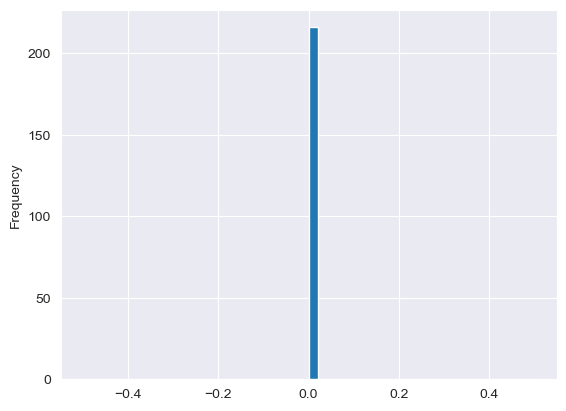

In [58]:
snowing_dif = df_snow["temp_max"] - df_snow["temp_min"]
snowing_dif.plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

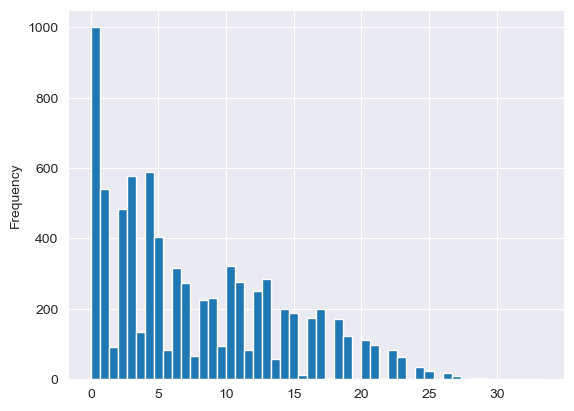

In [57]:
hot_dif = df_temp_max["temp_max"] - df_temp_max["temp_min"]
hot_dif.plot.hist(bins=50)

# Parte 2: Trasformazione e Predizione

# 2.1
## Si vuole predire il valore di 'weather_main' sulla base degli attributi presenti nel dataset. Dividere il dataset in modo che 2/3 degli elementi siano contenuti in un nuovo dataset “train” e 1/3 nel dataset “test”. Eliminare gli attributi ["dt_iso","city_name","weather_description", "weather_icon","weather_id", "clouds_all"] Convertire l’attributo 'weather_main' in numerico in maniera opportuna.

In [61]:
new_df = df.copy()
new_df

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-05-26 09:00:00+02:00,Bilbao,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,75,803,clouds,broken clouds,04d
1,2016-07-16 10:00:00+02:00,Madrid,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,0,800,clear,sky is clear,01d
2,2018-06-03 05:00:00+02:00,Madrid,285.150,285.150,285.150,1017,100,0,0,0.0,0.0,0.0,56,803,clouds,broken clouds,04n
3,2018-10-19 10:00:00+02:00,Valencia,289.150,289.150,289.150,1011,100,4,320,0.9,0.0,0.0,75,521,rain,shower rain,09d
4,2017-11-25 07:00:00+01:00,Seville,279.940,279.150,281.150,1019,81,0,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158126,2016-08-01 10:00:00+02:00,Madrid,297.760,293.710,305.050,1021,56,2,30,0.0,0.0,0.0,0,800,clear,sky is clear,01d
158127,2017-10-12 00:00:00+02:00,Barcelona,292.830,291.150,294.150,1024,88,0,280,0.0,0.0,0.0,0,800,clear,sky is clear,01n
158128,2015-11-09 16:00:00+01:00,Bilbao,292.810,292.810,292.810,1031,62,1,25,0.0,0.0,0.0,0,800,clear,sky is clear,01
158129,2016-02-25 05:00:00+01:00,Valencia,285.220,285.220,285.220,1012,60,4,265,0.0,0.0,0.0,0,800,clear,sky is clear,01


In [62]:
def Eliminate_cols(X, names):
    for name in names:
        X.drop(name,axis=1,inplace=True)
    return X

In [63]:
names =  ["dt_iso","city_name","weather_description", "weather_icon","weather_id", "clouds_all"]
Eliminate_cols(new_df,names)
new_df

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,weather_main
0,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,clouds
1,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,clear
2,285.150,285.150,285.150,1017,100,0,0,0.0,0.0,0.0,clouds
3,289.150,289.150,289.150,1011,100,4,320,0.9,0.0,0.0,rain
4,279.940,279.150,281.150,1019,81,0,50,0.0,0.0,0.0,clear
...,...,...,...,...,...,...,...,...,...,...,...
158126,297.760,293.710,305.050,1021,56,2,30,0.0,0.0,0.0,clear
158127,292.830,291.150,294.150,1024,88,0,280,0.0,0.0,0.0,clear
158128,292.810,292.810,292.810,1031,62,1,25,0.0,0.0,0.0,clear
158129,285.220,285.220,285.220,1012,60,4,265,0.0,0.0,0.0,clear


In [64]:
from sklearn.preprocessing import LabelEncoder
encoder  = LabelEncoder()

y = encoder.fit_transform(new_df["weather_main"])
new_df.drop("weather_main",axis=1, inplace=True)
y

array([1, 0, 1, ..., 0, 0, 2])

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, y,test_size=1/3,random_state=0)
train = X_train.assign(weather_main=y_train)
test = X_test.assign(weather_main=y_test)
test

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,weather_main
137687,297.69,293.15,302.04,1016,100,4,223,0.0,0.0025,0.0,0
86455,296.78,296.15,297.15,1023,47,2,20,0.0,0.0000,0.0,1
121953,294.04,291.15,295.93,996,53,9,150,0.0,0.0000,0.0,1
26381,290.46,287.15,296.15,1019,47,4,50,0.0,0.0000,0.0,0
144411,311.34,308.15,313.15,1014,14,5,270,0.0,0.0000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
124212,298.54,298.15,299.15,1012,29,5,100,0.0,0.0000,0.0,0
108831,306.15,306.15,306.15,1011,22,2,360,0.0,0.0000,0.0,0
108313,291.72,290.15,294.15,1020,64,1,0,0.0,0.0000,0.0,0
1375,282.93,282.93,282.93,990,90,1,351,0.0,0.0000,0.0,0


In [69]:
def test_model(name ,model,train_data, test_data, train_labels, test_labels):
    model.fit(train_data,train_labels)
    train_preds = model.predict(train_data)
    test_preds = model.predict(test_data)
    print(f" ===== {name} =====")
    print(f"Accuracy on train {accuracy_score(train_labels, train_preds)}")
    print(f"Accuracy on test {accuracy_score(test_labels, test_preds)}")
    print("Confusion matrix on test")
    print(confusion_matrix(test_labels, test_preds))

## Allenare il train con il modello Decision Tree e valutare l’accuracy ottenuta calcolata sia sul dataset train sia sul dataset test. Confrontare i risultati ottenuti con quelli ottenuti con una predizione basata sul modello Logistic Regression. Effettuare alcune considerazioni sui risultati ottenuti, tenendo in considerazione anche l’analisi della confusion matrix.

In [68]:
from sklearn.utils.multiclass import unique_labels
#class_names = ["clouds","clear","rain"]
#def plot_confusion_matrix(y_true, y_pred, classes,
     #                     normalize=False,
     #                     title=None,
     #                     cmap=plt.cm.Blues):
    #if not title:
    #    if normalize:
    #        title = 'Normalized confusion matrix'
    #    else:
    #        title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    #cm = confusion_matrix(y_true, y_pred)
    #if normalize:
     #   cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
   # else:
  #      print('Confusion matrix, without normalization')

 #   print(cm)

#    fig, ax = plt.subplots()
#    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
#    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
#    ax.set(xticks=np.arange(cm.shape[1]),
#           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
#           xticklabels=classes, yticklabels=classes,
#           title=title,
#           ylabel='True label',
#           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
#    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
#    fmt = '.2f' if normalize else 'd'
#    thresh = cm.max() / 2.
#    for i in range(cm.shape[0]):
#        for j in range(cm.shape[1]):
#            ax.text(j, i, format(cm[i, j], fmt),
#                    ha="center", va="center",
#                    color="white" if cm[i, j] > thresh else "black")
#    fig.tight_layout()
#    return ax


#np.set_printoptions(precision=2)

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



classifiers = [DecisionTreeClassifier(),LogisticRegression()]
names = ["DT","LR"]

for model,name in zip(classifiers,names):
    test_model(name,model, X_train, X_test, y_train, y_test)

 ===== DT =====
Accuracy on train 0.9969159233251091
Accuracy on test 0.6974378439931675
Confusion matrix on test
[[18003  7910     1]
 [ 8030 13343     1]
 [    0     0  5402]]
 ===== LR =====
Accuracy on train 0.5655911937749099
Accuracy on test 0.5648889732397039
Confusion matrix on test
[[19193  6554   167]
 [10932 10205   237]
 [ 1332  3704   366]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Considerazioni:
1. L'accuratezza dei due classificatore potrebbe essere cosí bassa perché comunque stiamo analizzando dataset non ancora normalizzati, quindi i valori non sono ancora tutti nella stessa scala
2. stiamo compiendo un train e un test non del tutto corretto perché avremo dovuto dividere in modo randomico le 2/3 parti in train e in test
3. il test e il train non cambiano quasi nulla in questo stato
4. Il DT nella confusion metrix predice perfettamente quando c'é pioggia

# 2.2
## Confrontare l’accuratezza ottenuta nel punto precedente con l’accuratezza che si ottiene con un una 10 Fold cross validation

In [74]:
from sklearn.model_selection import cross_val_score

for name,model in zip(names,classifiers):
    scores = cross_val_score(model,new_df,y,cv=10)
    print(f"the mean accuracy of {name} is : ",scores.mean())
    print(scores)

the mean accuracy of DT is :  0.7098690453596509
[0.71139369 0.70823053 0.71063453 0.71208958 0.71272221 0.71322832
 0.70702853 0.71076106 0.70677548 0.70582653]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

the mean accuracy of LR is :  0.5671980768014171
[0.56215601 0.57398621 0.56658442 0.56474979 0.56981084 0.565762
 0.5616499  0.56911495 0.56810274 0.5700639 ]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 2.3
## Utilizzare la funzione Normalizer per normalizzare i valori del dataset e confrontare se l’accuratezza ottenuta con il Decision Tree Classifier migliora

In [75]:
from sklearn.preprocessing import Normalizer
dt = classifiers[0]
norma = Normalizer()
df_norma = norma.fit_transform(new_df)
df_norma

array([[2.54737708e-01, 2.51849585e-01, 2.56954585e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.72911761e-01, 2.72911761e-01, 2.72911761e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.51233912e-01, 2.51233912e-01, 2.51233912e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.54411244e-01, 2.54411244e-01, 2.54411244e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.46205549e-01, 2.46205549e-01, 2.46205549e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.51544211e-01, 2.51544211e-01, 2.51544211e-01, ...,
        2.62242845e-04, 0.00000000e+00, 0.00000000e+00]])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(df_norma, y,test_size=1/3,random_state=0)
test_model("DT scaled",dt, X_train, X_test, y_train, y_test)

 ===== DT scaled =====
Accuracy on train 0.9969159233251091
Accuracy on test 0.6873220724995255
Confusion matrix on test
[[17794  8119     1]
 [ 8353 13020     1]
 [    0     1  5401]]


# 2.4
## Creare una pipeline con trasformatori PCA (si scelgano 5 attributi) e poi Normalizer. Si usi come modello il Decision Tree Classifier
## Extra: gli attributi della PCA vengono aggiunti agli attributi del dataset

In [77]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def identity(X):
    return X

pca = PCA(n_components=5)
combine_features = FeatureUnion([("pca",pca),("pass",FunctionTransformer(identity,validate=True))])

pipeline = Pipeline(steps=[("combine_features",combine_features),
                           ("norma",Normalizer()),
                           ("model",dt)],verbose=True)

pipeline

Pipeline(steps=[('combine_features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=5)),
                                                ('pass',
                                                 FunctionTransformer(func=<function identity at 0x7fe4094b1940>,
                                                                     validate=True))])),
                ('norma', Normalizer()), ('model', DecisionTreeClassifier())],
         verbose=True)

In [78]:
verify = combine_features.fit_transform(new_df)
verify

array([[  -3.8299931 , -168.03711249,  -24.7302488 , ...,    0.        ,
           0.        ,    0.        ],
       [ -55.24549588,  -85.27300733,   27.63688606, ...,    0.        ,
           0.        ,    0.        ],
       [   1.17150447, -167.98683868,  -33.3264367 , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [  15.04460936, -142.8969396 ,    6.71904569, ...,    0.        ,
           0.        ,    0.        ],
       [  -5.13956176,   97.12574937,    3.07015891, ...,    0.        ,
           0.        ,    0.        ],
       [   7.96584891, -126.97943705,  -31.30989534, ...,    0.3       ,
           0.        ,    0.        ]])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y,test_size=1/3,random_state=0)
test_model("Pipeline ", pipeline, X_train, X_test, y_train, y_test)

[Pipeline] .. (step 1 of 3) Processing combine_features, total=   0.1s
[Pipeline] ............. (step 2 of 3) Processing norma, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=   2.5s
 ===== Pipeline  =====
Accuracy on train 0.9969159233251091
Accuracy on test 0.6938508255836022
Confusion matrix on test
[[17962  7951     1]
 [ 8177 13196     1]
 [    1     0  5401]]


# 2.5
## Utilizzare la funzione di gridSearchCV sulla pipeline per modificare il numero di attributi selezionati dalla PCA e alcuni parametri a piacere del classificatore. Verificare se l’accuratezza che si ottiene con la nuova configurazione supera quella standard ottenuta al punto 2.1

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.9/site-pac

[Pipeline] .. (step 1 of 2) Processing combine_features, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.8s
{'combine_features__pca__n_components': 5, 'model__criterion': 'entropy', 'model__min_samples_split': 2, 'model__splitter': 'best'}
accuracy of  :  0.6732710847946557
Confusion matrix, without normalization
[[4273 2131    0]
 [2173 3250    0]
 [   0    0 1346]]


<AxesSubplot:title={'center':'Confusion matrix of :'}, xlabel='Predicted label', ylabel='True label'>

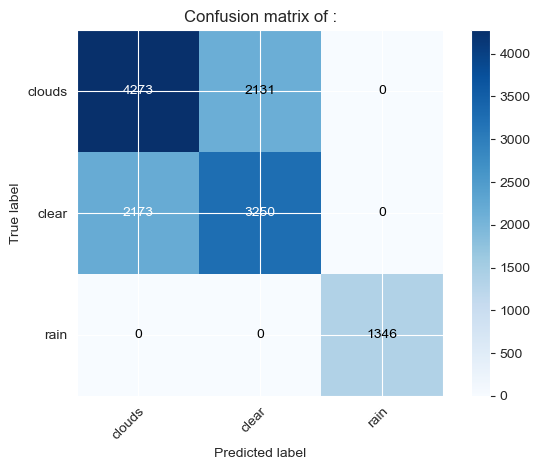

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df_test, y_testing,random_state=0)
from sklearn.model_selection import GridSearchCV
params = {'model__criterion':["gini", "entropy", "log_loss"],
          'model__splitter':["best","random"],
          'model__min_samples_split':[2,1,4],
          'combine_features__pca__n_components':[2,5,3]}
gs = GridSearchCV(pipeline,params,n_jobs=-1)

gs.fit(X_train,y_train)
pred = gs.predict(X_test)
print(gs.best_params_)
score = accuracy_score(y_test,pred)
print('accuracy of  : ',score)
plot_confusion_matrix(y_test, pred, classes=class_names, title='Confusion matrix of :')

# 2.6
## Si verifichi l’accuratezza ottenuta dalla pipeline del punto 4 con il file weather_test. I risultati corretti sono nel file class.csv. Controllare le features presenti nei dataset.

In [98]:
weather_test = pd.read_csv("Data/weather_test.csv")
weather_test

,Unnamed: 0,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_description,weather_icon
0,0,2015-10-23 18:00:00+02:00,Madrid,293.150,293.150,293.150,1019,45,2,200,0.0,0.0,0.0,0,800,sky is clear,01d
1,1,2015-01-01 06:00:00+01:00,Madrid,265.442,265.442,265.442,972,64,0,240,0.0,0.0,0.0,0,800,sky is clear,01n
2,2,2015-07-24 22:00:00+02:00,Madrid,302.870,301.050,304.150,1012,29,6,290,0.0,0.0,0.0,0,800,sky is clear,01n
3,3,2015-05-27 22:00:00+02:00,Madrid,291.944,291.944,291.944,956,34,3,29,0.0,0.0,0.0,0,800,sky is clear,01n
4,4,2015-07-06 18:00:00+02:00,Madrid,312.540,310.650,313.150,1017,11,5,220,0.0,0.0,0.0,20,801,few clouds,02d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2016-11-15 09:00:00+01:00,Seville,290.060,282.150,300.150,1024,81,4,70,0.0,0.0,0.0,0,800,sky is clear,01d
9996,9996,2017-12-03 04:00:00+01:00,Seville,276.540,276.150,277.150,1025,86,0,0,0.0,0.0,0.0,0,800,sky is clear,01n
9997,9997,2016-05-23 22:00:00+02:00,Valencia,289.190,287.590,291.150,1020,63,3,70,0.0,0.0,0.0,0,800,sky is clear,01n
9998,9998,2018-06-19 09:00:00+02:00,Seville,292.110,290.150,295.150,1018,64,1,348,0.0,0.0,0.0,0,800,sky is clear,01d


In [100]:
names =  ["dt_iso","city_name","weather_description", "weather_icon","weather_id", "clouds_all","Unnamed: 0"]
weather_test = Eliminate_cols(weather_test,names)

In [101]:
weather_test

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h
0,293.150,293.150,293.150,1019,45,2,200,0.0,0.0,0.0
1,265.442,265.442,265.442,972,64,0,240,0.0,0.0,0.0
2,302.870,301.050,304.150,1012,29,6,290,0.0,0.0,0.0
3,291.944,291.944,291.944,956,34,3,29,0.0,0.0,0.0
4,312.540,310.650,313.150,1017,11,5,220,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,290.060,282.150,300.150,1024,81,4,70,0.0,0.0,0.0
9996,276.540,276.150,277.150,1025,86,0,0,0.0,0.0,0.0
9997,289.190,287.590,291.150,1020,63,3,70,0.0,0.0,0.0
9998,292.110,290.150,295.150,1018,64,1,348,0.0,0.0,0.0


In [105]:
y = pd.read_csv("Data/class.csv")
y = y.drop("Unnamed: 0",axis=1)
y

,weather_main
0,clear
1,clear
2,clear
3,clear
4,clouds
...,...
9995,clear
9996,clear
9997,clear
9998,clear


In [106]:
y = encoder.fit_transform(y)
y

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

[Pipeline] .. (step 1 of 2) Processing combine_features, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s
{'combine_features__pca__n_components': 3, 'model__criterion': 'entropy', 'model__min_samples_split': 4, 'model__splitter': 'best'}
accuracy of  :  0.6548
Confusion matrix, without normalization
[[791 423   0]
 [440 552   0]
 [  0   0 294]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.9/site-pac

<AxesSubplot:title={'center':'Confusion matrix of :'}, xlabel='Predicted label', ylabel='True label'>

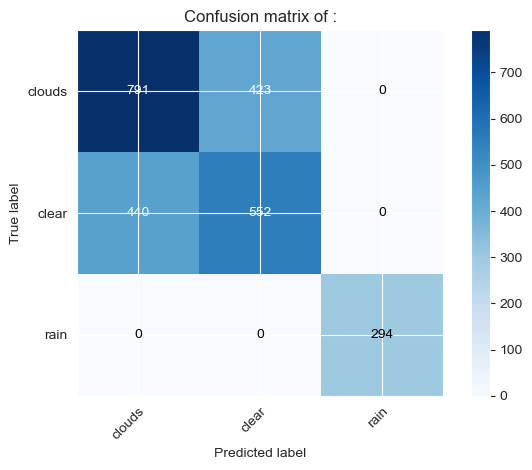

In [107]:
X_train, X_test, y_train, y_test = train_test_split(weather_test, y,random_state=0)
gs = GridSearchCV(pipeline,params,n_jobs=-1)

gs.fit(X_train,y_train)
pred = gs.predict(X_test)
print(gs.best_params_)
score = accuracy_score(y_test,pred)
print('accuracy of  : ',score)
plot_confusion_matrix(y_test, pred, classes=class_names, title='Confusion matrix of :')

# 2.7
## Si sperimenti una pipeline come quella del punto 4 dove al posto del classificatore si utilizzi un regressore lineare. Il risultato dovrà essere approssimato all’intero per il calcolo dell’accuratezza

In [108]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


LogisticRegression()

In [109]:
pipeline_lr = Pipeline(steps=[("combine_features",combine_features),
                           ("model",lr)],verbose=True)

pipeline_lr

Pipeline(steps=[('combine_features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=5)),
                                                ('normalizer', Normalizer())])),
                ('model', LogisticRegression())],
         verbose=True)

[Pipeline] .. (step 1 of 2) Processing combine_features, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.2s
rounded accuracy of  :  0.516
Confusion matrix, without normalization
[[956 232  26]
 [643 321  28]
 [ 91 190  13]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:title={'center':'Confusion matrix of :'}, xlabel='Predicted label', ylabel='True label'>

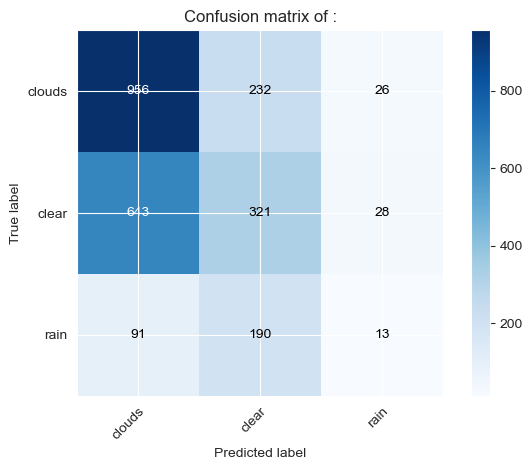

In [110]:
X_train, X_test, y_train, y_test = train_test_split(weather_test, y,random_state=0)
gs = GridSearchCV(pipeline,params,n_jobs=-1)

pipeline_lr.fit(X_train,y_train)
pred = pipeline_lr.predict(X_test)
score = accuracy_score(y_test,np.round(pred))
print('rounded accuracy of  : ',score)
plot_confusion_matrix(y_test, np.round(pred), classes=class_names, title='Confusion matrix of :')